In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
detector = cv2.FaceDetectorYN.create(
    "models/face_detection_yunet_2022mar.onnx", "", (320, 320), 0.9, 0.3, 5000
    )

img = cv2.imread('media/images/shawsshank redemption.jpg')
cimg = img.copy()
w = img.shape[1]
h = img.shape[0]

In [19]:
def visualize_faces(img, faces, thickness=4):
    face_crds = [] 
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(img, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            face_crds.append([coords[0],coords[1],coords[2],coords[3]])
            cv2.circle(img, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(img, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(img, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(img, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(img, (coords[12], coords[13]), 2, (0, 255, 255), thickness)
            
    return face_crds

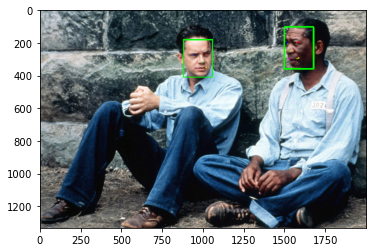

In [20]:
detector.setInputSize((w,h))
faces = detector.detect(cimg)
face_crds = visualize_faces(cimg,faces)
plt.imshow(cimg[...,::-1])

([], [])

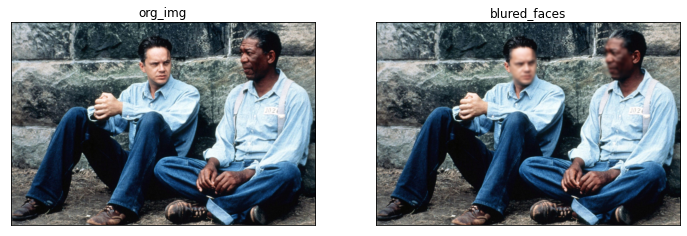

In [28]:
# blur faces 
plt.figure(figsize=[12,8])
bimg = img.copy()

for i, (x, y, w, h) in enumerate(face_crds):
    k = i * 2
    face_roi = bimg[y:y+h, x:x+w]
    blurred_face = cv2.GaussianBlur(face_roi, (19, 19), 7)  
    bimg[y:y+h, x:x+w] = blurred_face

plt.subplot(121);plt.imshow(img[...,::-1]);plt.title('org_img');plt.xticks([]);plt.yticks([])
plt.subplot(122);plt.imshow(bimg[...,::-1]);plt.title('blured_faces');plt.xticks([]);plt.yticks([])